<a href="https://colab.research.google.com/github/bres/PytorchStudy/blob/main/simple_NeuralNetowrk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F


In [3]:
# Create a Model Class that inherits nn.Module
class Model(nn.Module):
  # Input layer ( 4 features of the flower) -->
  # Hidden Layer1 (number of neurons) -->
  # Hidden Layer2 (number of neurons) -->
  # output ( 3 classes of iris flowers)
  def __init__(self,in_features=4,h1=8,h2=8,out_features=3):
    super().__init__()
    self.fc1 = nn.Linear(in_features,h1)
    self.fc2 = nn.Linear(h1,h2)
    self.out = nn.Linear(h2,out_features)

  def forward(self,x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x


In [4]:
torch.manual_seed(41)
#create an instance of our model
model = Model()

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [6]:
url ="https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv"
my_df = pd.read_csv(url)

In [7]:
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [8]:
#change to integers
my_df['variety'] = my_df['variety'].replace({'Setosa':0,'Versicolor':1,'Virginica':2})

<ipython-input-8-5b46ae86818c>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['variety'] = my_df['variety'].replace({'Setosa':0,'Versicolor':1,'Virginica':2})


In [9]:
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [10]:
# Train Test Split! Set X,y
X = my_df.drop('variety',axis=1)
y = my_df['variety']


In [11]:
# convert the dataframe to numpy arrays
X = X.values
y = y.values

In [12]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [13]:
from sklearn.model_selection import train_test_split
# Train Test Split
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=41)

In [14]:
# Convert X features to float tensors
X_train =torch.FloatTensor(X_train)
X_test =torch.FloatTensor(X_test)
# Convert y labels to float tensors
y_train =torch.LongTensor(y_train)
y_test =torch.LongTensor(y_test)

In [15]:
# Set the criteria of model to measure the error
criterion = nn.CrossEntropyLoss()
# Choose Adam Optimizer, lr =learning rate
optimizer = torch.optim.Adam(model.parameters(),lr=0.006)

In [16]:
# train out model!
# epochs?
epochs =100
losses = []
for i in range(epochs):
  #Go forward and get a prediction
  y_pred = model.forward(X_train) # Get predicted results

  # Measure the error/loss
  loss = criterion(y_pred,y_train)
  losses.append(loss.detach().numpy())

  # print every 10 epochs
  if i % 10 == 0:
    print(f'Epoch:{i} and loss: {loss}')

  # Do some back propagation: take the error rate of forward propagation and feed it
  # back through the network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch:0 and loss: 1.1318365335464478
Epoch:10 and loss: 1.026422142982483
Epoch:20 and loss: 0.9050782918930054
Epoch:30 and loss: 0.7014024257659912
Epoch:40 and loss: 0.4969688653945923
Epoch:50 and loss: 0.3494783639907837
Epoch:60 and loss: 0.2444709986448288
Epoch:70 and loss: 0.1684165745973587
Epoch:80 and loss: 0.11949152499437332
Epoch:90 and loss: 0.09033632278442383


Text(0.5, 0, 'Epoch')

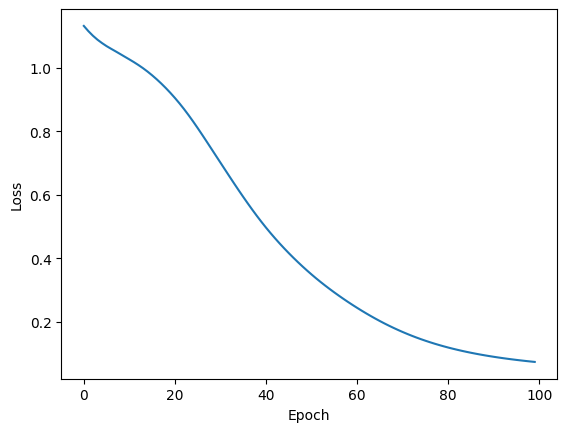

In [17]:
# graph it out
plt.plot(range(epochs),losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [18]:
# Evaluate Model on the Test data (validate model on test set)
with torch.no_grad(): # Basically turn off back propagation
  y_eval = model.forward(X_test) # X_test are features from our test set,y_eval wiil be predictions
  loss = criterion(y_eval,y_test)



In [19]:
loss


tensor(0.1538)

In [22]:
correct =0
with torch.no_grad():
  for i,data in enumerate(X_test):
    y_val = model.forward(data)
    print(f'{i+1}. {str(y_val)} {y_test[i]} \t {y_val.argmax().item()}')

    #CORRECT OR NOT
    if y_val.argmax().item() ==y_test[i]:
      correct +=1
print(f'{correct} out of {len(y_test)} = {100*correct/len(y_test)}% correct')


1. tensor([-5.5489,  1.1743,  3.1706]) 2 	 2
2. tensor([-7.1643,  0.7456,  5.5389]) 2 	 2
3. tensor([-7.4355,  1.1647,  4.9841]) 2 	 2
4. tensor([-3.5602,  1.9861, -0.3854]) 1 	 1
5. tensor([-6.3868,  1.2046,  3.8797]) 2 	 2
6. tensor([-2.0683,  2.1197, -2.5567]) 1 	 1
7. tensor([-5.0891,  1.4828,  2.0767]) 2 	 2
8. tensor([-3.3738,  2.0320, -0.6851]) 1 	 1
9. tensor([-5.7303,  1.3326,  2.9857]) 2 	 2
10. tensor([-7.5456,  0.7790,  5.8410]) 2 	 2
11. tensor([-4.9917,  1.4520,  2.0377]) 2 	 2
12. tensor([  5.5178,   0.8804, -11.6350]) 0 	 0
13. tensor([  5.0455,   0.7761, -10.5769]) 0 	 0
14. tensor([-1.2297,  1.7414, -2.8783]) 1 	 1
15. tensor([  4.6454,   1.0171, -10.4026]) 0 	 0
16. tensor([-4.9876,  1.5233,  1.9298]) 2 	 2
17. tensor([  4.9236,   0.8921, -10.5390]) 0 	 0
18. tensor([-5.5133,  1.2061,  3.0599]) 1 	 2
19. tensor([  5.7623,   0.7951, -11.9509]) 0 	 0
20. tensor([ 4.5450,  0.8615, -9.8149]) 0 	 0
21. tensor([-1.6998,  1.9139, -2.5881]) 1 	 1
22. tensor([-6.9571,  1.0383

In [23]:
# Evaluate new data
new_iris = torch.tensor([4.7,3.2,1.3,0.2])

with torch.no_grad():
  print(model.forward(new_iris))
  print(model.forward(new_iris).argmax().item())

tensor([  5.4093,   0.7969, -11.2941])
0


In [24]:
# Save and load our model
torch.save(model.state_dict(),'my_iris.pt')

In [25]:
# load our model
new_model = Model()
new_model.load_state_dict(torch.load('my_iris.pt'))


<All keys matched successfully>

In [26]:
# Make sure is loaded correctly
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=8, bias=True)
  (out): Linear(in_features=8, out_features=3, bias=True)
)